# Лабораторная работа №2. Дискретные LTI системы.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса. 

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile
from IPython.display import Audio

Из лекции по LTI системам:
* Импульсная характеристика $h[k]$ — отклик (реакция) системы на входное воздействие $x[k]=\mathbf{1} [k]$ при инициализации выхода нулем ($y[k]=0$ при $k < 0$)
* Реакция $y[k]$ дискретной LTI системы на входное воздействие $x[k]$  может быть представлена как дискретная линейная свертка ее импульсной характеристики и сигнала $x[k]$
$$y[k]=\sum\limits_{m=-\infty }^{\infty }{x}[m]h[k-m].$$
* Частотная $H(\nu)$ и импульсная $h[k]$ характеристики дискретной LTI системы связаны через ДВПФ 
\begin{equation} 
H(\nu)=\sum_{k=-\infty}^{\infty}h[k]e^{-j2\pi\nu k},\\
h[k]=\int_{-1/2}^{1/2}H(\nu)e^{j2\pi\nu k}d\nu.
\end{equation}
* Выход системы в частотной области $Y(\nu)=X(\nu)H(\nu)$. 


## Каузальная аппроксимация идеального фильтра нижних частот

Рассмотрим идеальный фильтр нижних частот (ИФНЧ), частотная характеристика которого по переменной $\nu$ периодическая с периодом $1$ и равна на промежутке $[-0.5; 0.5]$
$$
H_0\left(\nu\right) при \left|\nu\right|\leq0.5 =\left\{\begin{array}{l}1,\;\left|\nu \right| \le\nu_c,\\0,\;\nu_c<\left|\nu\right|\leq0.5.\end{array}\right.
$$


In [4]:
nu_c=0.1

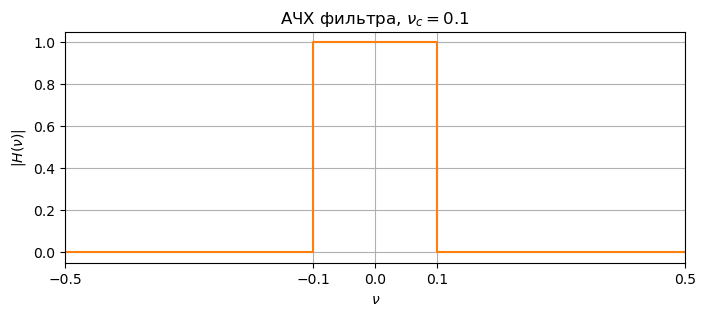

In [5]:
plt.figure(figsize=[8, 3])
plt.step([-0.5, -nu_c, 0, nu_c, 0.5], [0, 0, 1, 1, 0], 'C1-')
plt.xticks([-0.5, -nu_c, 0, nu_c, 0.5])
plt.xlim([-0.5, 0.5])
plt.title("АЧХ фильтра, $\\nu_c=0.1$")
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.grid()
plt.show()

Импульсная характеристика
\begin{equation}
h_0[k]= \int_{-1/2}^{1/2}H_0\left(\nu\right)e^{j2\pi\nu k}d\nu = 
\int_{-\nu_c}^{\nu_c} e^{j2\pi\nu k}d\nu  = \int_{-\nu_c}^{\nu_c} \dfrac{ e^{j2\pi\nu k} d(j2\pi k \nu)}{j2\pi k} =
\dfrac{1}{\pi k} \dfrac{e^{j2\pi\nu_c k}-e^{-j2\pi\nu_c k}}{2j} =\dfrac{\sin(2\pi\nu_c k)}{\pi k}
\end{equation}

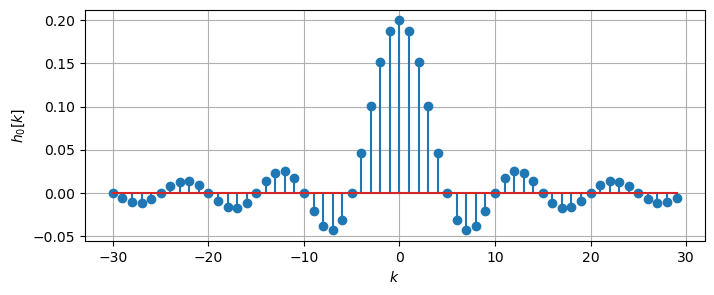

In [6]:
def h_0(k, nu_c):
    if k!=0:
        return np.sin(2*np.pi*nu_c*k)/(np.pi*k)
    return 2*nu_c
plt.figure(figsize=[8, 3])
k=np.arange(-30, 30, 1)
plt.stem(k, [h_0(k1, nu_c) for k1 in k])
plt.xlabel("$k$")
plt.ylabel("$h_0[k]$")
plt.grid()
plt.show()

Заметим, что импульсная характеристика $h_0[k]$ некаузальна (не обращается тождественно в нуль при $k<0$). Это означает, что идеальный фильтр нижних частот не реализуем. 


Последовательность $h_0[k]$ не является абсолютно суммируемой, члены последовательности стремятся к нулю не быстрее, чем $1/k$. При этом ряд 
$$H_0(\nu) =\sum_{k=-\infty}^{+\infty}\frac{\sin(2\pi \nu_c k)}{\pi k}e^{-j 2\pi \nu k}$$
сходится неравномерно на числовой оси.

\begin{equation}
H_0(\nu,\;N)=\sum_{k=-N}^N\frac{\sin(2\pi \nu_c k)}{\pi k}e^{-j 2 \pi \nu k}.
\end{equation}
 $H_0(\nu,\;N)$ сходится к $H_0(\nu)$ в среднеквадратичном:
$$\lim_{N\rightarrow\infty}\int_{-1/2}^{1/2} \left|H_0(\nu)-H_0(\nu,\;N)\right|^2 d\nu=0.$$
При достаточно больших $N$ мы можем наблюдать отличие лишь вблизи точек разрыва $H_0(\nu)$. Учет поведения частичных сумм ДВПФ важен при разработке дискретных фильтров. 

<Figure size 800x300 with 0 Axes>

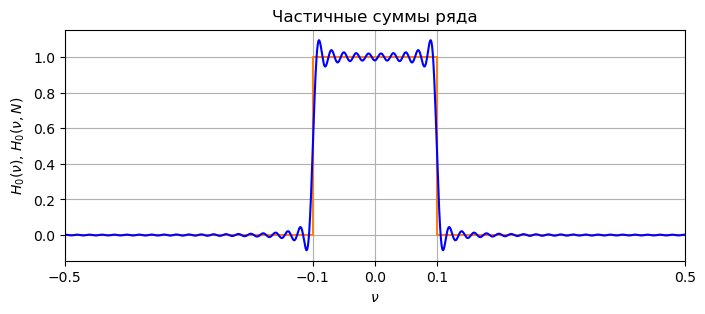

In [22]:
N=50
nu_c=0.1

def path_sum(N, nu, nu_c):
    k=np.arange(-N, N+1, 1)
    H_part=np.zeros_like(nu, dtype=complex)
    for k1 in k:
        H_part += h_0(k1, nu_c)*np.exp(-1j*2*np.pi*nu*k1)
    return H_part

plt.figure(figsize=[8, 3])
k=np.arange(-30, 30, 1)

nu=np.linspace(-0.5, 0.5, 2048)

plt.figure(figsize=[8, 3])
plt.step([-0.5, -nu_c, 0, nu_c, 0.5], [0, 0, 1, 1, 0], 'C1-')
plt.plot(nu, path_sum(N, nu, nu_c).real, 'b')
plt.xticks([-0.5, -nu_c, 0, nu_c, 0.5])
plt.xlim([-0.5, 0.5])
plt.xlabel("$\\nu$")
plt.ylabel("$H_0(\\nu)$, $H_0(\\nu, N)$")
plt.title("Частичные суммы ряда")
plt.grid()
plt.show()

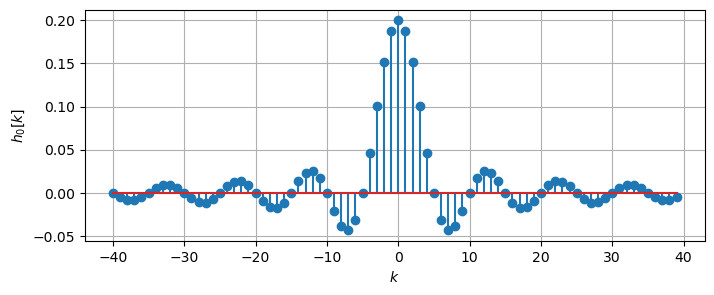

In [24]:
def h_0(k, nu_c):
    if k!=0:
        return np.sin(2*np.pi*nu_c*k)/(np.pi*k)
    return 2*nu_c
plt.figure(figsize=[8, 3])
k=np.arange(-40, 40, 1)
plt.stem(k, [h_0(k1, nu_c) for k1 in k])
plt.xlabel("$k$")
plt.ylabel("$h_0[k]$")
plt.grid()
plt.show()

* Сдвиг импульсной характеристики не изменяет АЧХ.
* Конечное число слагаемых ряда соотвествует ограничению импульсной харакетеристики по длительности. 

In [37]:
N=30

In [38]:
def h_0_shifted(k, nu_c, N):
    if (k-N)!=0:
        return np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c

In [39]:
k = np.arange(0, 2*N+1, 1)
h = np.array([h_0_shifted(x, nu_c, N) for x in k])

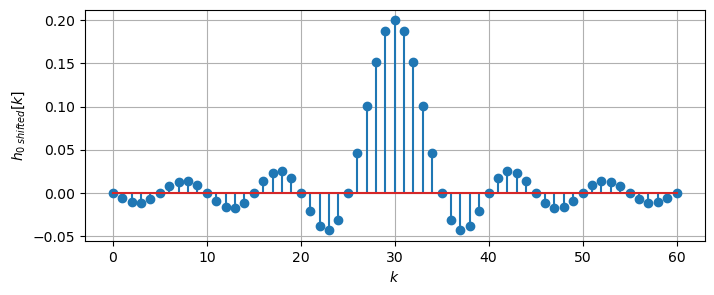

In [40]:
plt.figure(figsize=[8, 3])
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h_{0\;shifted}[k]$")
plt.grid()
plt.show()

In [41]:
theta, H = signal.freqz(b=h, worN=2**12, whole=True)
nu=theta/(2*np.pi)-0.5
H=np.fft.fftshift(H)

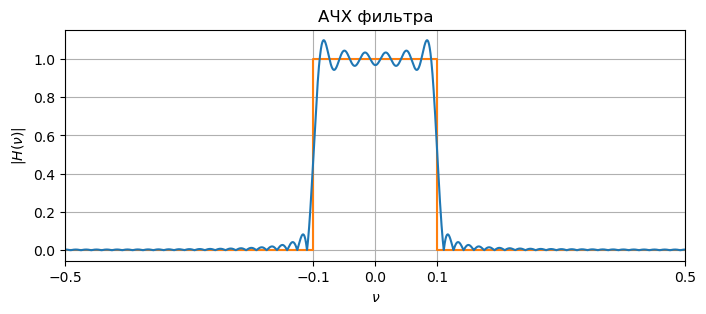

In [42]:
plt.figure(figsize=[8, 3])
plt.step([-0.5, -nu_c, 0, nu_c, 0.5], [0, 0, 1, 1, 0], 'C1-')
plt.plot(nu, abs(H))

plt.xticks([-0.5, -nu_c, 0, nu_c, 0.5])
plt.xlim([-0.5, 0.5])
plt.title("АЧХ фильтра")
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.grid()
plt.show()

## Каузальная аппроксимация для идеального полосового фильтра

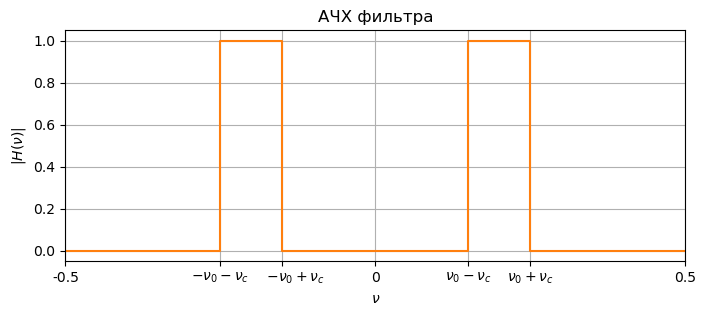

In [43]:
nu_c = 0.05
nu_0 = 0.2
plt.figure(figsize=[8, 3])
plt.step([-0.5, -nu_0-nu_c, -nu_0+nu_c, 0,  nu_0-nu_c, nu_0+nu_c, 0.5], [0, 0, 1, 0, 0, 1,  0], 'C1-')
plt.xticks([-0.5, -nu_0-nu_c, -nu_0+nu_c, 0,  nu_0-nu_c, nu_0+nu_c, 0.5], 
           labels=("-0.5", "$-\\nu_0-\\nu_c$", "      $-\\nu_0+\\nu_c$", "0",  "$\\nu_0-\\nu_c$", "$\\nu_0+\\nu_c$", "0.5"))
plt.xlim([-0.5, 0.5])
plt.title("АЧХ фильтра")
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.grid()
plt.show()

$H_{bp}(\nu)=H_{0}(\nu-\nu_0) + H_{0}(\nu+\nu_0)$

Воспользуемся теоремой смещения для ДВПФ

$h_{bp}[k]=\exp (j 2\pi \nu_0) h_0[k] +\exp (-j 2\pi \nu_0) h_0[k]= 2\cos(2\pi\nu_0 k) \dfrac{\sin(2\pi\nu_c k)}{\pi k}$

$h_{bp-shifted}[k]=2\cos(2\pi\nu_0 (k-N)) \dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}$, при $0 \le k \le 2N+1$

In [44]:
def h_bp_shifted(k, nu_0, nu_c, N):
    if (k-N)!=0:
        return 2*np.cos(2*np.pi*nu_0*(k-N))*np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c*2*np.cos(2*np.pi*nu_0*(k-N))

In [62]:
N = 60*5
nu_c = 0.05
nu_0 = 0.2
k = np.arange(0, 2*N+1, 1)
h = np.array([h_bp_shifted(x, nu_0, nu_c, N) for x in k])

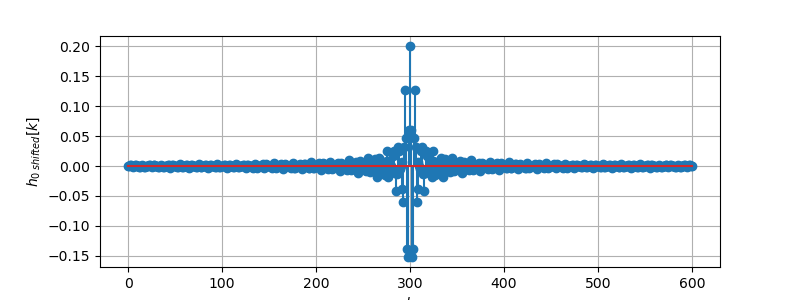

In [63]:
plt.figure(figsize=[8, 3])
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h_{0\;shifted}[k]$")
plt.grid()
plt.show()

In [64]:
%matplotlib widget

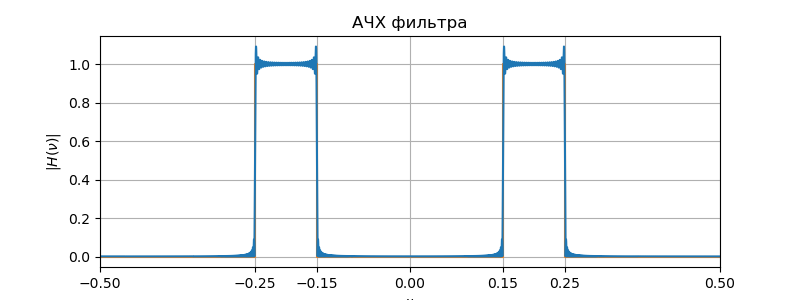

In [65]:
theta, H = signal.freqz(b=h, worN=2**16, whole=True)
nu=theta/(2*np.pi)-0.5
H=np.fft.fftshift(H)
plt.figure(figsize=[8, 3])
plt.step([-0.5, -nu_0-nu_c, -nu_0+nu_c, 0,  nu_0-nu_c, nu_0+nu_c, 0.5], [0, 0, 1, 0, 0, 1,  0], 'C1-')
plt.plot(nu, abs(H))

plt.xticks([-0.5, -nu_0-nu_c, -nu_0+nu_c, 0,  nu_0-nu_c, nu_0+nu_c, 0.5])
plt.xlim([-0.5, 0.5])
plt.title("АЧХ фильтра")
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.grid()
plt.show()

## Пример применения. Подавление высокочастотных компонент в звуковом файле.

Приведем пример применения каузальной аппроксимации идеального фильтра нижних частот. Ниже приведен звуковой файл, содержащий и высокие, и низкие частоты. 

In [66]:
Audio('./piano10.wav')

In [67]:
fs, x1=scipy.io.wavfile.read('./piano10.wav')

C:\Users\torma\AppData\Local\Temp\ipykernel_15272\2519329790.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x1=scipy.io.wavfile.read('./piano10.wav')


Отсчеты сигнала

In [68]:
x1

array([ 418,  426,  433, ..., -548, -548, -552], dtype=int16)

Частота дискретизации, Гц

In [69]:
fs

44100

Время записи 

In [70]:
x1.shape[0]/fs

11.105827664399094

Вычислим спектр дискретизованнного сигнала

In [71]:
X=scipy.fft.fftshift(scipy.fft.fft(x1))
nu=-0.5+np.linspace(0, 1, num=x1.size, endpoint=False)

* Нормированные частоты $\nu = f / f_\text{д}$
* Частоты в Гц $f = \nu f_\text{д}$

Оценим спектр звукового сигнала с помощью ДВПФ.

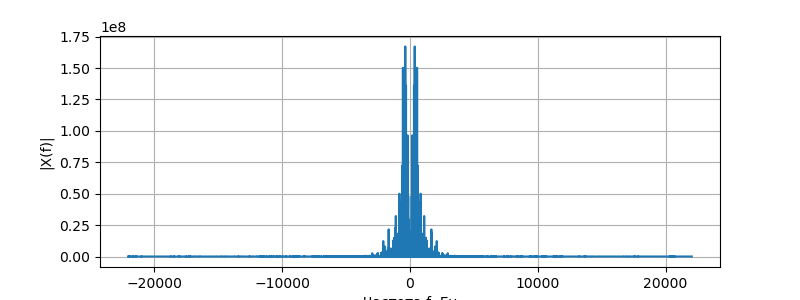

In [72]:
plt.figure(figsize=[8, 3])
plt.plot(nu*fs, abs(X))
#plt.xlim([0, 2000])
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|")
plt.grid()
plt.show()

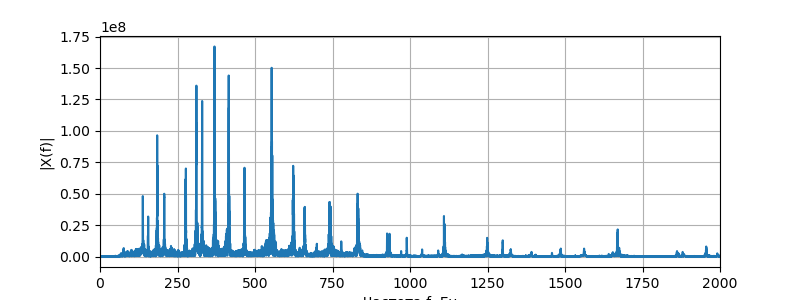

In [73]:
plt.figure(figsize=[8, 3])
plt.plot(nu*fs, abs(X))
plt.xlim([0, 2000])
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|")
plt.grid()
plt.show()

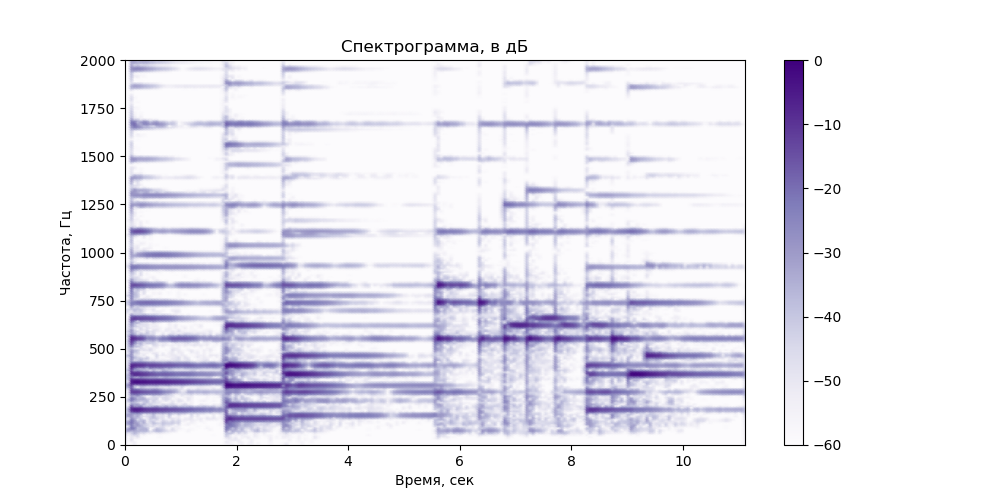

In [74]:
plt.figure(figsize=[10, 5])
f, t, Zxx = signal.stft(x1, fs, nperseg=5000, window='blackman')
max_Zxx=np.max(np.abs(Zxx))
plt.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)/max_Zxx), shading='gouraud', cmap='Purples', vmin=-60)
plt.colorbar()
plt.ylim((0, 2000))
plt.title("Спектрограмма, в дБ")
plt.ylabel('Частота, Гц')
plt.xlabel('Время, сек')
plt.show()

In [75]:
Audio('./piano10.wav')

Пропустим сигнал через фильтр нижних частот с частотой среза 500 Гц. Ей соотвествует нормированная частота

In [76]:
nu_c=500/fs
nu_c

0.011337868480725623

Реализуем каузальную аппроксимацию идеального фильтра нижних частот.

In [85]:
def h_0_shifted(k, nu_c=500/fs):
    if (k-N)!=0:
        return np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c

#N=200
N=1000
k=np.arange(0, 2*N+1, 1)
h = np.array([h_0_shifted(x, nu_c=nu_c) for x in k])

АЧХ фильтра имеет вид.

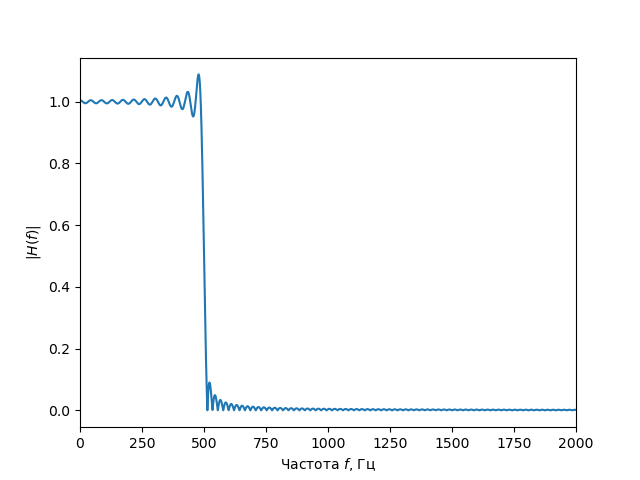

In [86]:
H=scipy.fft.fftshift(scipy.fft.fft(h, 2**17))
nu=-0.5+np.linspace(0, 1, num=H.size)
plt.figure()
plt.plot(nu*fs, abs(H))
plt.xlim([0, 2000])
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|H(f)|$");

Поскольку это КИХ фильтр, то выход можно расчитать с помощью функции `signal.convolve`. 

In [88]:
y=signal.convolve(x1, h)
y

array([ 0.11328553,  0.23353692,  0.35998501, ..., -0.4648199 ,
       -0.30445556, -0.14960194])

Полученный массив содержит вещественные числа. Сделаем приведение типа и получим цифровой сигнал с битной глубинной записи 16 бит на отсчет.

In [89]:
y=np.array(y, dtype=np.int16)

Оценим спектр сигнала.

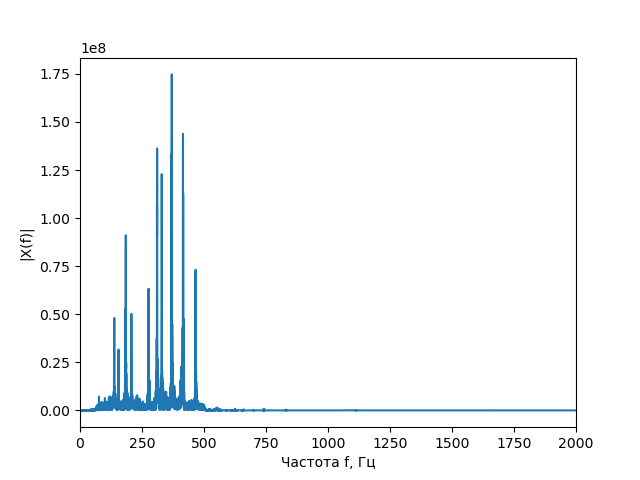

In [91]:
Y=scipy.fft.fftshift(scipy.fft.fft(y))
nu=-0.5+np.linspace(0, 1, num=y.size)
plt.figure()
plt.plot(nu*fs, abs(Y))
plt.xlim([0, 2000])
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|");

Воспроизведем.

In [92]:
scipy.io.wavfile.write(filename='./piano11.wav', rate=fs, data=y)
Audio('./piano11.wav')

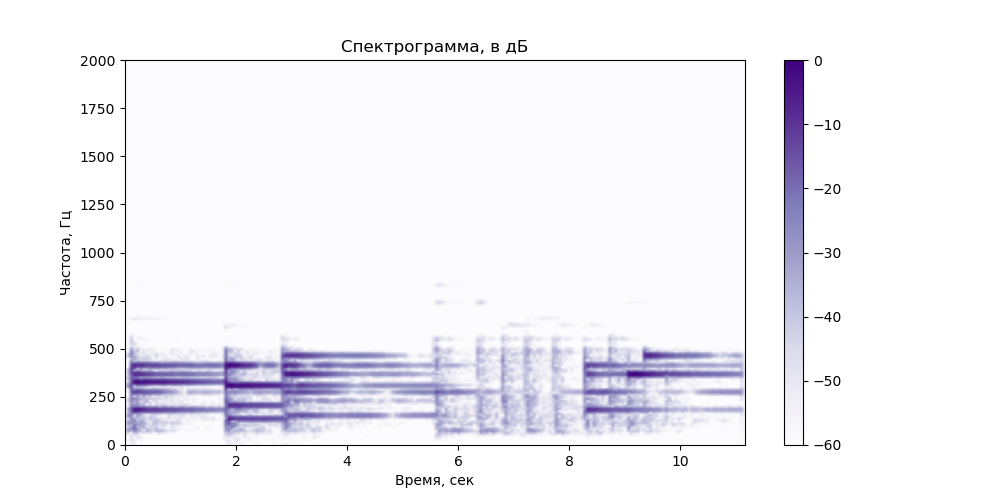

In [93]:
plt.figure(figsize=[10, 5])
f, t, Zxx = signal.stft(y, fs, nperseg=5000, window='blackman')
max_Zxx=np.max(np.abs(Zxx))
plt.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)/max_Zxx), shading='gouraud', cmap='Purples', vmin=-60)
plt.colorbar()
plt.ylim((0, 2000))
plt.title("Спектрограмма, в дБ")
plt.ylabel('Частота, Гц')
plt.xlabel('Время, сек')
plt.show()

1. Кузнецов Л. А. Акустика музыкальных инструментов. Москва: Легпромбытиздат, 1989. 367 с.

## Пример решения задачи 3.2
Пример, который разбирали на занятии на доске. 

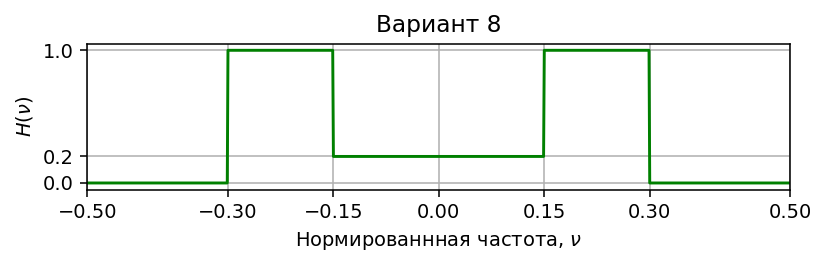

После сдвига на $N$ тактов дискретизации и ограничения окном длиной в $2N+1$ отсчет получилась импульсная характеристика 
$$ h[k]=\dfrac{\sin(2 \pi 0.3 (k-N))}{\pi (k-N)} - 0.8 \dfrac{\sin(2 \pi 0.15 (k-N))}{\pi (k-N)}, k=0, \,1, \, \dots,  2N+1$$

In [147]:
def h_8(k, N):
    if (k-N)!=0:
        return np.sin(2*np.pi*0.3*(k-N))/(np.pi*(k-N))-0.8*np.sin(2*np.pi*0.15*(k-N))/(np.pi*(k-N))
    return 0.6-0.8*0.3

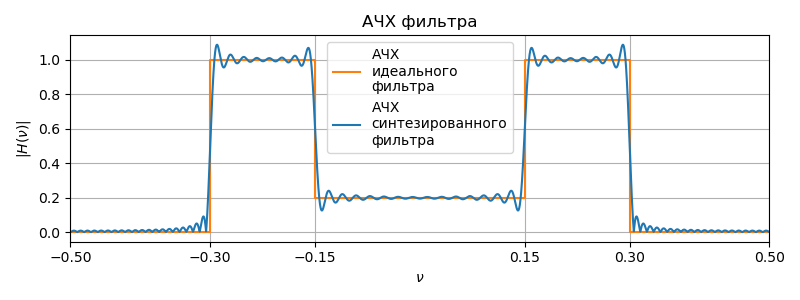

In [149]:
def var8_magnitude_response(N):
    k=np.arange(0, 2*N+2, 1)
    h=np.array([h_8(k1, N) for k1 in k])
    theta, H = signal.freqz(b=h, worN=2**16, whole=True)
    nu=theta/(2*np.pi)-0.5
    H=np.fft.fftshift(H)
    plt.figure(figsize=[8, 3])
    dict_ideal_frequency_response = {-0.5:0, -0.30:0, -0.15:1, 0.15:0.2, 0.3:1, 0.5:0}
    plt.step(dict_ideal_frequency_response.keys(),  dict_ideal_frequency_response.values(), 'C1-', label="АЧХ\nидеального\nфильтра")
    plt.plot(nu, abs(H), label="АЧХ\nсинтезированного\nфильтра")
    plt.legend(ncols=1, loc='upper center')
    plt.xlim([-0.5, 0.5])
    plt.xticks(list(dict_ideal_frequency_response.keys()))
    plt.title("АЧХ фильтра")
    plt.xlabel("$\\nu$")
    plt.ylabel("$|H(\\nu)|$")
    plt.grid()
    plt.tight_layout()
    plt.show()
var8_magnitude_response(N=50)

Вывод импульсной характеристики идеального фильтра через импульсную характеристику ИФНЧ. 

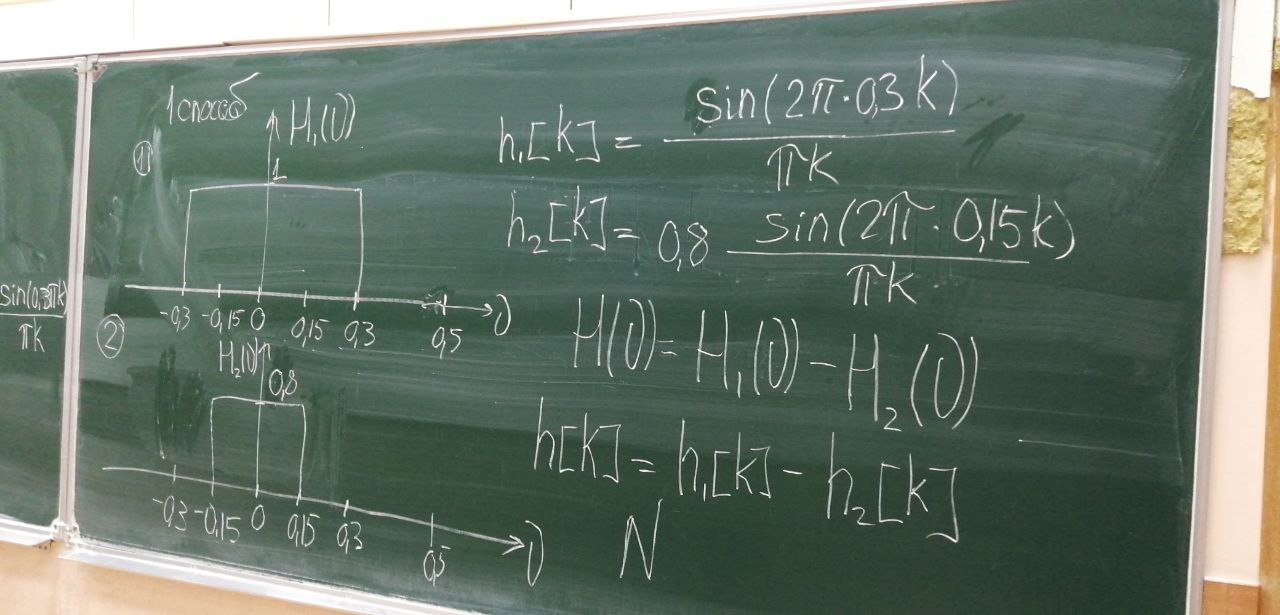

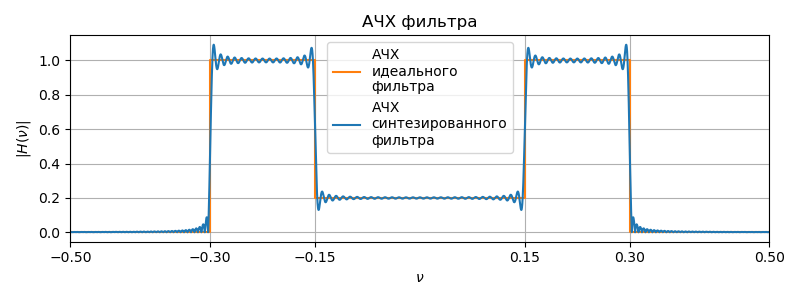

In [152]:
var8_magnitude_response(N=100)

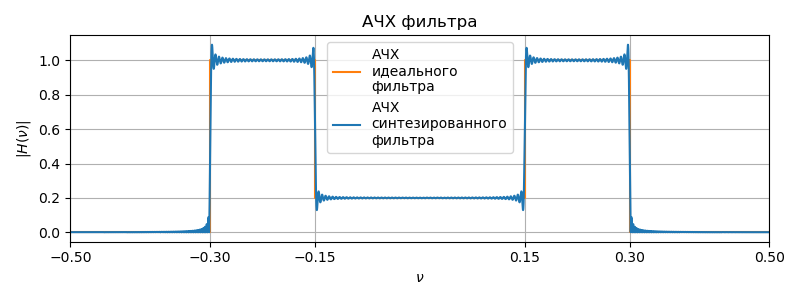

In [151]:
var8_magnitude_response(N=200)

С ростом $N$ наблюдаем сходимость к прямоугольной АЧХ в среднеквадратичном. Наблюдаются неустранимые всплески АЧХ вблизи частот среза (явление Гиббса). 